<a href="https://colab.research.google.com/github/doveliyuchen/CC_Project_1_fall_2019/blob/master/%E2%80%9Clab1_ipynb%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1:  Simple linear regression for one independent variable

In this lab, you will load data, plot data, perform simple mathematical manipulations, and fit a simple linear regression model.  Before doing this lab, you can go through the class demo on simple linear regression for an automobile dataset.  The lab use the Ames Housing dataset which is a commonly used machine learning data set for illustrating basic concepts.  

## Loading the data

The Ames housing data set was collected in 2011 and contains information about home sales in Ames, Iowa, including the sale price and numerical and categorical information about each home. We have constructed a "reduced" version of the dataset that is available at:

https://www.chrismusco.com/machinelearning2024_grad/AmesHousing.csv.

More information about the meaning of each column can be found here: https://cran.r-project.org/web/packages/AmesHousing/AmesHousing.pdf. Note that our version of the dataset contains a subset of the columns in the original dataset and the last column, SalesPrice, is in units of 1000s of US dollars in our version.

In the lab, you will complete all the code marked `TODO`.

First, complete the following code that uses the `pd.read_csv` command to read the data from the file linked above.

In [1]:
import pandas as pd
import numpy as np
# TODO:  Complete the code
df = pd.read_csv("https://www.chrismusco.com/machinelearning2024_grad/AmesHousing.csv")

Display the first six rows of the data frame

In [3]:
# TODO
print(df.head(6))
# TODO

   Lot Area  Year Built  Bsmt Unf SF  Total Bsmt SF  1st Flr SF  2nd Flr SF  \
0     31770        1960        441.0         1080.0        1656           0   
1     11622        1961        270.0          882.0         896           0   
2     14267        1958        406.0         1329.0        1329           0   
3     11160        1968       1045.0         2110.0        2110           0   
4     13830        1997        137.0          928.0         928         701   
5      9978        1998        324.0          926.0         926         678   

   Gr Liv Area  Full Bath  Half Bath  Bedroom AbvGr  TotRms AbvGrd  \
0         1656          1          0              3              7   
1          896          1          0              2              5   
2         1329          1          1              3              6   
3         2110          2          1              3              8   
4         1629          2          1              3              6   
5         1604          2 

## Basic Manipulations on the Data

What is the shape of the data?  How many attributes are there?  How many samples?
Print a statement of the form:

    num samples=xxx, num attributes=yy

In [4]:
print("num samples="+str(df.shape[0])+", num attributes="+str(df.shape[1]))

num samples=2930, num attributes=15


The dataset contains some NaN value. Before proceeding, drop all rows from the dataframe with NaN values. There should only be a few.

In [5]:
# TODO
new_df = df.dropna()

Create a response vector `y` with the values in the column `SalePrice`.  The vector `y` should be a 1D `numpy.ndarray` structure.

In [6]:
# TODO
y = df["SalePrice"]
y = np.array(y)
print(y)

[215. 105. 172. ... 132. 170. 188.]


Use the response vector `y` to find the mean house price in thousands and the fraction of homes that are above $120k. Print and label your results.

In [7]:
# TODO
y_mean = np.mean(y)
y_120k = y>120
fraction_above_120k = np.sum(y_120k)/y.size
print("Mean house price in thousands: "+str(y_mean))
print("Fraction of homes above $120k: "+str(fraction_above_120k))

Mean house price in thousands: 180.79606006825938
Fraction of homes above $120k: 0.8167235494880546


## Visualizing the Data

Load the `matplotlib` package with the following commands.

In [8]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Similar to the `y` vector, create a predictor vector `x` containing the values in the `TotRms AbvGrd` column, which represents the total number of non-basement rooms in the home.

In [9]:
# TODO
x = df["TotRms AbvGrd"]
x = np.array(x)
print(x)

[7 5 6 ... 6 6 9]


Create a scatter plot of the price vs. the `TotRms AbvGrd` attribute.  Label the axes with reasonable labels so that someone else can understand the plot.

Text(0, 0.5, 'Sale Price')

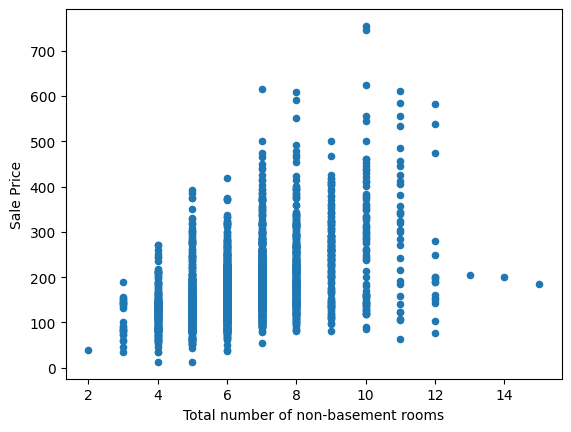

In [10]:
# TODO
df.plot.scatter(x="TotRms AbvGrd", y="SalePrice")
plt.xlabel("Total number of non-basement rooms")
plt.ylabel("Sale Price")

## Fitting a Simple Linear Model

We will write a simple function to perform a linear fit under the squared loss function. Use the formulae given in the class to compute the optimal parameters $\beta_0,\beta_1$ in the linear model $$y =\beta_0 + \beta_1 x$$ as well as the optimal loss $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$.

In [11]:
def fit_linear(x,y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       y = beta0 + beta1*x,
    The function returns beta0, beta1, and loss, where loss is the sum-of-squares loss of.
    """
    # TODO complete the following code


    beta1 = np.sum((x-x.mean())*(y-y_mean)/(x-x.mean())**2)
    beta0 = y_mean-beta1*x.mean()
    loss = np.sum((y-(beta0+beta1*x))**2)
    # print(beta0,beta1,loss)
    # loss = ...
    return beta0, beta1, loss

Using the function `fit_linear` above, print the values `beta0`, `beta1` and `loss` for the linear model of price vs. number of rooms.

In [12]:
parameter_linear= fit_linear(x,y)
print("beta0="+str(parameter_linear[0]),"beta1="+str(parameter_linear[1]),"loss="+str(parameter_linear[2]))

beta0=-595224.8699611404 beta1=92411.19829654315 loss=61854301651058.06


Replot the scatter plot above, but now with the regression line.  You can create the regression line by creating points `yp` that are the predicted values for each value in `x`, according to our linear model. Plot as a line, not a scatter plot.

Text(0, 0.5, 'Sale Price')

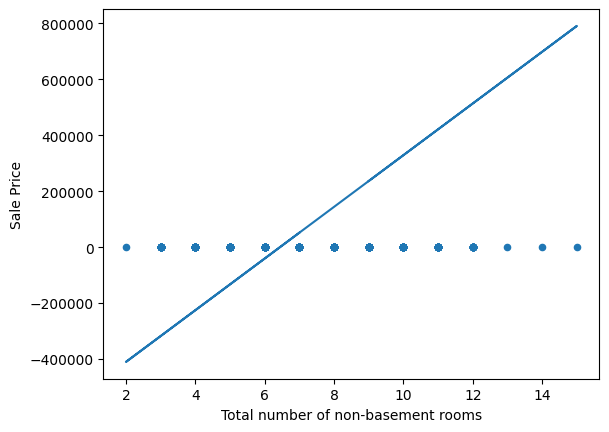

In [27]:

# y=df.SalePrice

yp=parameter_linear[0]+parameter_linear[1]*x

df.plot.scatter(x="TotRms AbvGrd", y="SalePrice")
plt.plot(x,yp)
plt.xlabel("Total number of non-basement rooms")
plt.ylabel("Sale Price")

# Part 2:  Compare different dependent variables


We next compute the squared loss for all the predictors and output the values in a table. Your table should look like the following, where each entry in the first column is the attribute name and the second column is the squared loss.

    Lot Area           XXXXX
    Overall Qual       XXXXX
    Overall Cond       XXXXX
    ...         ...

You will need to write a loop to perform this task.

What variable does the best job predicting house price?

In [41]:
loss_ary=[]
for key in df:
  # print(df[key])
  loss=fit_linear(df[key],y)[2]
  loss_ary.append(loss)
  print(key,"  ",loss)
# for item in df.columns():
loss_ary=np.array(loss_ary)
# print(min(loss_ary))

Lot Area    69712215469514.04
Year Built    141261667750861.44
Bsmt Unf SF    1606736836415.1416
Total Bsmt SF    161073758227290.56
1st Flr SF    84540953396995.75
2nd Flr SF    51872738693749.234
Gr Liv Area    526007244402681.5
Full Bath    48587527630867.31
Half Bath    15085665619011.383
Bedroom AbvGr    574094628217.9324
TotRms AbvGrd    61854301651058.06
Fireplaces    53283691441047.0
Garage Cars    24227467752999.234
Garage Area    925596452848043.2
SalePrice    160364042263726.44
574094628217.9324


**TODO:** Describe in words the meaning of the most predictive variable for housing price.

***People are more willing to pay more for more bedrooms. Also, more bedrooms typically suggest a larger overall living space, which can command a higher price due to increased utility and space.***


# Part 3:  Compare different loss functions

## A Brute force algorithm for squared loss

Your code in `fit_linear` relies on the closed form expressions for the optimal $\beta_0$ and $\beta_1$, which we derived in class. However, if you did not know these formulas, you could have approximately minimized the loss function by brute force searching over a grid of possible values for $\beta_0$ and $\beta_1$.

For example, we could try out all combinations of parameters where $\beta_0$ is in `np.arange(-50,50,.1)` and $\beta_1$ is in `np.arange(-1,1,.005)`

Write a function which takes this approach to find a $\beta_0$ and $\beta_1$ which approximately minimize the squared loss: $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$

In [45]:
def fit_approx(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the sum-of-squares loss. The min_loss returned is the lost of the best beta0 and beta1 you found.
    """
    # TODO complete the following code
    beta0 = np.arange(-50,50,.1)
    beta1 = np.arange(-1,1,.005)
    min_loss = np.inf

    for i in beta0:
      for j in beta1:
        loss = np.sum((y-(i+j*x))**2)
        if loss < min_loss:
          min_loss = loss
          beta0_min = i
          beta1_min = j
    print(min_loss, beta0_min, beta1_min)
  # beta0 = ...
    # beta1 = ...
    # min_loss = ...

    return beta0_min, beta1_min, min_loss




Compare the output of `fit_approx` and `fit_linear` with `y` being `SalePrice` and `x` being the `Gr Liv Area` variable from our dataset. You should do so:
* quantitatively, by printing the loss that each approach achieves
* and visually, by plotting the different fit lines obtained.

9357057.693953998 15.800000000000935 0.11000000000000099
Approx loss:  9357057.693953998
Linear loss:  526007244402681.5


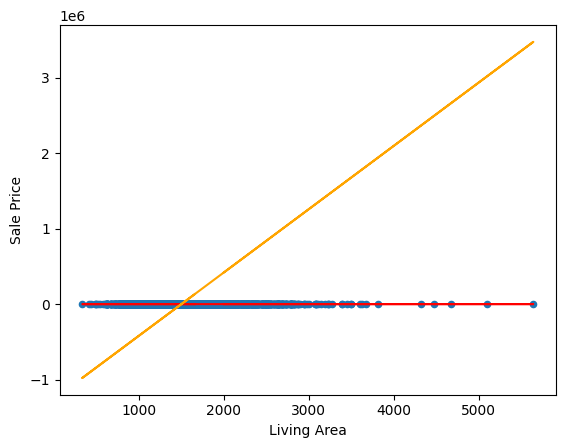

In [48]:
y=np.array(df["SalePrice"])
x=np.array(df["Gr Liv Area"])
parameter_approx= fit_approx(x,y)
yp_approx=parameter_approx[0]+parameter_approx[1]*x
parameter_linear= fit_linear(x,y)
yp_linear=parameter_linear[0]+parameter_linear[1]*x

df.plot.scatter(x="Gr Liv Area", y="SalePrice")
# df.plot.scatter(x="Gr Liv Area", y="SalePrice")
plt.plot(x,yp_approx, color="red")
plt.plot(x,yp_linear, color="orange")
plt.xlabel("Ground Living Area")
plt.ylabel("Sale Price")
print("Approx loss: ",parameter_approx[2])
print("Linear loss: ",parameter_linear[2])


## Extending to different loss functions

One benefit of the above approach is that is easily extends to different loss funtions. Write functions which find an approximately optimal $\beta_0$ and $\beta_1$ for
* minimizing the $\ell_1$ (least absolute deviations) loss: $\sum_{i=1}^n |y_i - \beta_0 - \beta_1 x|$
* minimizing the $\ell_\infty$ (max) loss: $\max_i |y_i - \beta_0 - \beta_1 x|$


In [46]:
def fit_approx_l1(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the least absolute deviations loss.
    """

    # TODO complete the following code

    beta1 = np.sum((x-x.mean())*(y-y_mean)/(x-x.mean())**2)
    beta0 = y_mean-beta1*x.mean()
    # loss =
    min_loss = np.sum(abs(y-(beta0+beta1*x)))

    return beta0, beta1, min_loss

In [50]:
def fit_approx_max(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the max loss.
    """
    beta1 = np.sum((x-x.mean())*(y-y_mean)/(x-x.mean())**2)
    beta0 = y_mean-beta1*x.mean()
    min_loss = np.max(abs(y-(beta0+beta1*x)))


    return beta0, beta1, min_loss

**TODO:** Use your algorithm to obtain 3 different linear fits for `SalePrice` with predictor variable `Gr Liv Area`, one for squared loss, one for $\ell_1$ loss, and one for $\ell_\infty$ loss. Plot the linear fits (along with the data scatter plot) on a single figure and use a legend to indicate which fit corresponds to which loss.

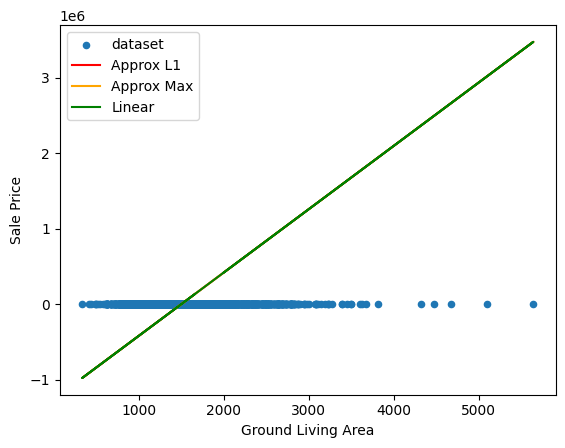

In [55]:
parameter_approx_l1= fit_approx_l1(x,y)
parameter_approx_max= fit_approx_max(x,y)
yp_approx_l1=parameter_approx_l1[0]+parameter_approx_l1[1]*x
yp_approx_max=parameter_approx_max[0]+parameter_approx_max[1]*x
df.plot.scatter(x="Gr Liv Area", y="SalePrice")
plt.plot(x,yp_approx_l1, color="red")
plt.plot(x,yp_approx_max, color="orange")
plt.plot(x,yp_linear, color="green")
plt.xlabel("Ground Living Area")
plt.ylabel("Sale Price")
plt.legend(["dataset","Approx L1", "Approx Max", "Linear"])

**TODO:** Repeat the process above for the `Lot Area` predictor variable, which has some more extreme outliers. Note that  this variable has a different scale than `Gr Liv Area` so you might need to adjust your approximate fit functions accordingly.

Again produce a plot that contains three different linear fits for all three different loss functions. Write 1-2 sentences of discussion about how the choice of loss function effected the fit.

The choice of loss function in this is hard to tell, because the line are overlapping each other.

[423555.47312699  29044.22718627  80835.08709858 ...   5919.46138043
  -2519.80539545 -10019.20023341]


Text(0, 0.5, 'Sale Price')

<Figure size 1000x600 with 0 Axes>

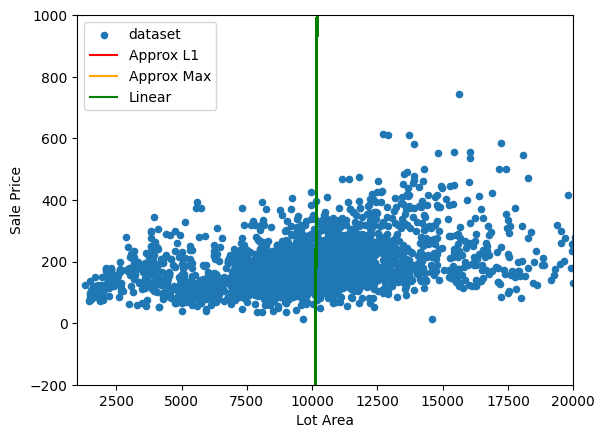

In [82]:
x=np.array(df["Lot Area"])
y=np.array(df["SalePrice"])

parameter_approx_l1= fit_approx_l1(x,y)
parameter_approx_max= fit_approx_max(x,y)
parameter_linear= fit_linear(x,y)
plt.figure(figsize=(10, 6))
yp_linear=parameter_linear[0]+parameter_linear[1]*x

print(yp_linear)
yp_approx_l1=parameter_approx_l1[0]+parameter_approx_l1[1]*x
yp_approx_max=parameter_approx_max[0]+parameter_approx_max[1]*x



df.plot.scatter(x="Lot Area", y="SalePrice")
plt.plot(x,yp_approx_l1, color="red")
plt.plot(x,yp_approx_max, color="orange")
plt.plot(x,yp_linear, color="green")
plt.xlim([1000, 20000])
plt.ylim([-200 , 1000])

plt.legend(["dataset","Approx L1", "Approx Max", "Linear"])
plt.xlabel("Lot Area")
plt.ylabel("Sale Price")

